# Data Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re
import sys
import inspect
import numpy as np

In [3]:
tweets = pd.read_csv('../data/cleaned_africa_data.csv')
tweets.head()

,created_at,source,full_text,sentiment,polarity,subjectivity,lang,statuses_count,favorite_count,retweet_count,screen_name,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,location
0,2022-08-03 20:19:13+00:00,Twitter for Android,pelosi airplane landed safely taiwan amp playi...,1,0.300000,0.203571,en,888,0,0,DzCritical,318,373,False,Pelosi,,Algérie
1,2022-08-02 15:24:42+00:00,Twitter Web App,watch video beginning chinese bombing taiwan p...,-1,0.000000,0.000000,en,1597,3,0,toopsat,764,144,False,Pelosi,,
2,2022-08-02 15:02:35+00:00,Twitter for Android,pelosi taipei taiwan xijinping china verge ano...,-1,0.000000,0.000000,en,2293,2,0,NassimaLilEmy,64,47,False,Pelosi,,Algérie
3,2022-08-01 13:51:42+00:00,Twitter for Android,hobipalooza laacademiaexpulsion weuro jhopeatl...,1,0.433333,0.733333,en,44,0,0,d_dhayae,60,463,False,HOBIPALOOZA,,Chlef
4,2022-07-31 20:02:20+00:00,Twitter for Android,pelosi china china time httpstcotedjztlszu,-1,0.000000,0.000000,en,1313,2,0,Mohamme65404115,39,206,False,Pelosi,,Algérie


In [4]:
#To get information about the data
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6735 entries, 0 to 6734
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6735 non-null   object 
 1   source              6735 non-null   object 
 2   full_text           6735 non-null   object 
 3   sentiment           6735 non-null   int64  
 4   polarity            6735 non-null   float64
 5   subjectivity        6735 non-null   float64
 6   lang                6735 non-null   object 
 7   statuses_count      6735 non-null   int64  
 8   favorite_count      6735 non-null   int64  
 9   retweet_count       6735 non-null   int64  
 10  screen_name         6735 non-null   object 
 11  followers_count     6735 non-null   int64  
 12  friends_count       6735 non-null   int64  
 13  possibly_sensitive  6735 non-null   bool   
 14  hashtags            6735 non-null   object 
 15  user_mentions       6735 non-null   object 
 16  locati

In [5]:
tweets.shape

(6735, 17)

In [6]:
print("The number of missing value(s) based on columns:\n{}".format(tweets.isnull().sum()))
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columns having missing value(s):{}".format(tweets.columns[tweets.isnull().any()]))

The number of missing value(s) based on columns:
created_at            0
source                0
full_text             0
sentiment             0
polarity              0
subjectivity          0
lang                  0
statuses_count        0
favorite_count        0
retweet_count         0
screen_name           0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
location              0
dtype: int64
The number of missing value(s): 0
Columns having missing value(s):Index([], dtype='object')


In [7]:
import sys
import os

In [8]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [9]:
from clean_tweets_dataframe import CleanTweets

In [10]:
tweets_df = pd.DataFrame(columns=['full_text', 'sentiment', 'hashtags', 'lang'])

tweets_df['sentiment'] =  tweets['sentiment'].to_list()
tweets_df['lang'] = tweets['lang'].to_list()
tweets_df['hashtags'] = tweets['hashtags'].to_list()
tweets_df['full_text'] = tweets['full_text'].to_list()

tweets_df.head()

,full_text,sentiment,hashtags,lang
0,pelosi airplane landed safely taiwan amp playi...,1,Pelosi,en
1,watch video beginning chinese bombing taiwan p...,-1,Pelosi,en
2,pelosi taipei taiwan xijinping china verge ano...,-1,Pelosi,en
3,hobipalooza laacademiaexpulsion weuro jhopeatl...,1,HOBIPALOOZA,en
4,pelosi china china time httpstcotedjztlszu,-1,Pelosi,en


In [13]:
tweets_df.dropna(subset=['full_text'], inplace=True)
tweets_df.reset_index(drop=True, inplace=True)

In [14]:
tweets_df.head()

,full_text,sentiment,hashtags,lang
0,pelosi airplane landed safely taiwan amp playi...,1,Pelosi,en
1,watch video beginning chinese bombing taiwan p...,-1,Pelosi,en
2,pelosi taipei taiwan xijinping china verge ano...,-1,Pelosi,en
3,hobipalooza laacademiaexpulsion weuro jhopeatl...,1,HOBIPALOOZA,en
4,pelosi china china time httpstcotedjztlszu,-1,Pelosi,en


In [15]:
tweets_df = tweets_df.fillna("")
tweets_df.head()

,full_text,sentiment,hashtags,lang
0,pelosi airplane landed safely taiwan amp playi...,1,Pelosi,en
1,watch video beginning chinese bombing taiwan p...,-1,Pelosi,en
2,pelosi taipei taiwan xijinping china verge ano...,-1,Pelosi,en
3,hobipalooza laacademiaexpulsion weuro jhopeatl...,1,HOBIPALOOZA,en
4,pelosi china china time httpstcotedjztlszu,-1,Pelosi,en


In [16]:
tweets_df['full_text'] =  tweets_df['full_text'].astype(str)
tweets_df['full_text']= tweets_df['full_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
tweets_df['sentiment'] =  tweets_df['sentiment'].astype(int)
tweets_df['hashtags'] = tweets_df['hashtags'].astype(str)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.lower())
tweets_df['hashtags']= tweets_df['hashtags'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

In [17]:
tweets_df.drop(tweets_df[tweets_df['sentiment'] == -1].index, inplace=True)
tweets_df.reset_index(drop=True, inplace=True)

In [19]:
flattened_words_df = pd.DataFrame(
    [word for words_list in tweets_df['full_text']
    for word in words_list.split(' ')],
    columns=['word'])

flattened_words_df.head()

,word
0,pelosi
1,airplane
2,landed
3,safely
4,taiwan


<AxesSubplot:>

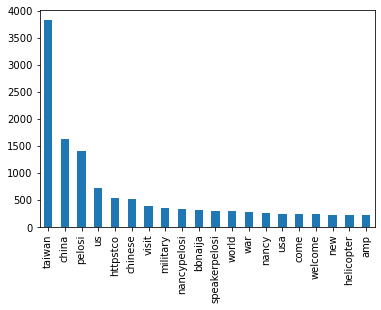

In [20]:
flattened_words_df['word'].value_counts()[:20].plot(kind='bar')

In [21]:
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in tweets_df.hashtags
    for hashtag in hashtags_list.split(',')],
    columns=['hashtag'])

flattened_hashtags_df.drop(flattened_hashtags_df[flattened_hashtags_df['hashtag'] == ""].index, inplace=True)
flattened_hashtags_df.reset_index(drop=True, inplace=True)
flattened_hashtags_df.head()

,hashtag
0,pelosi
1,hobipalooza
2,yk
3,taiwan
4,pelosi


<AxesSubplot:>

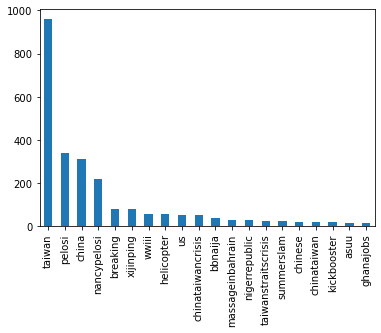

In [22]:
flattened_hashtags_df.hashtag.value_counts()[:20].plot(kind='bar')

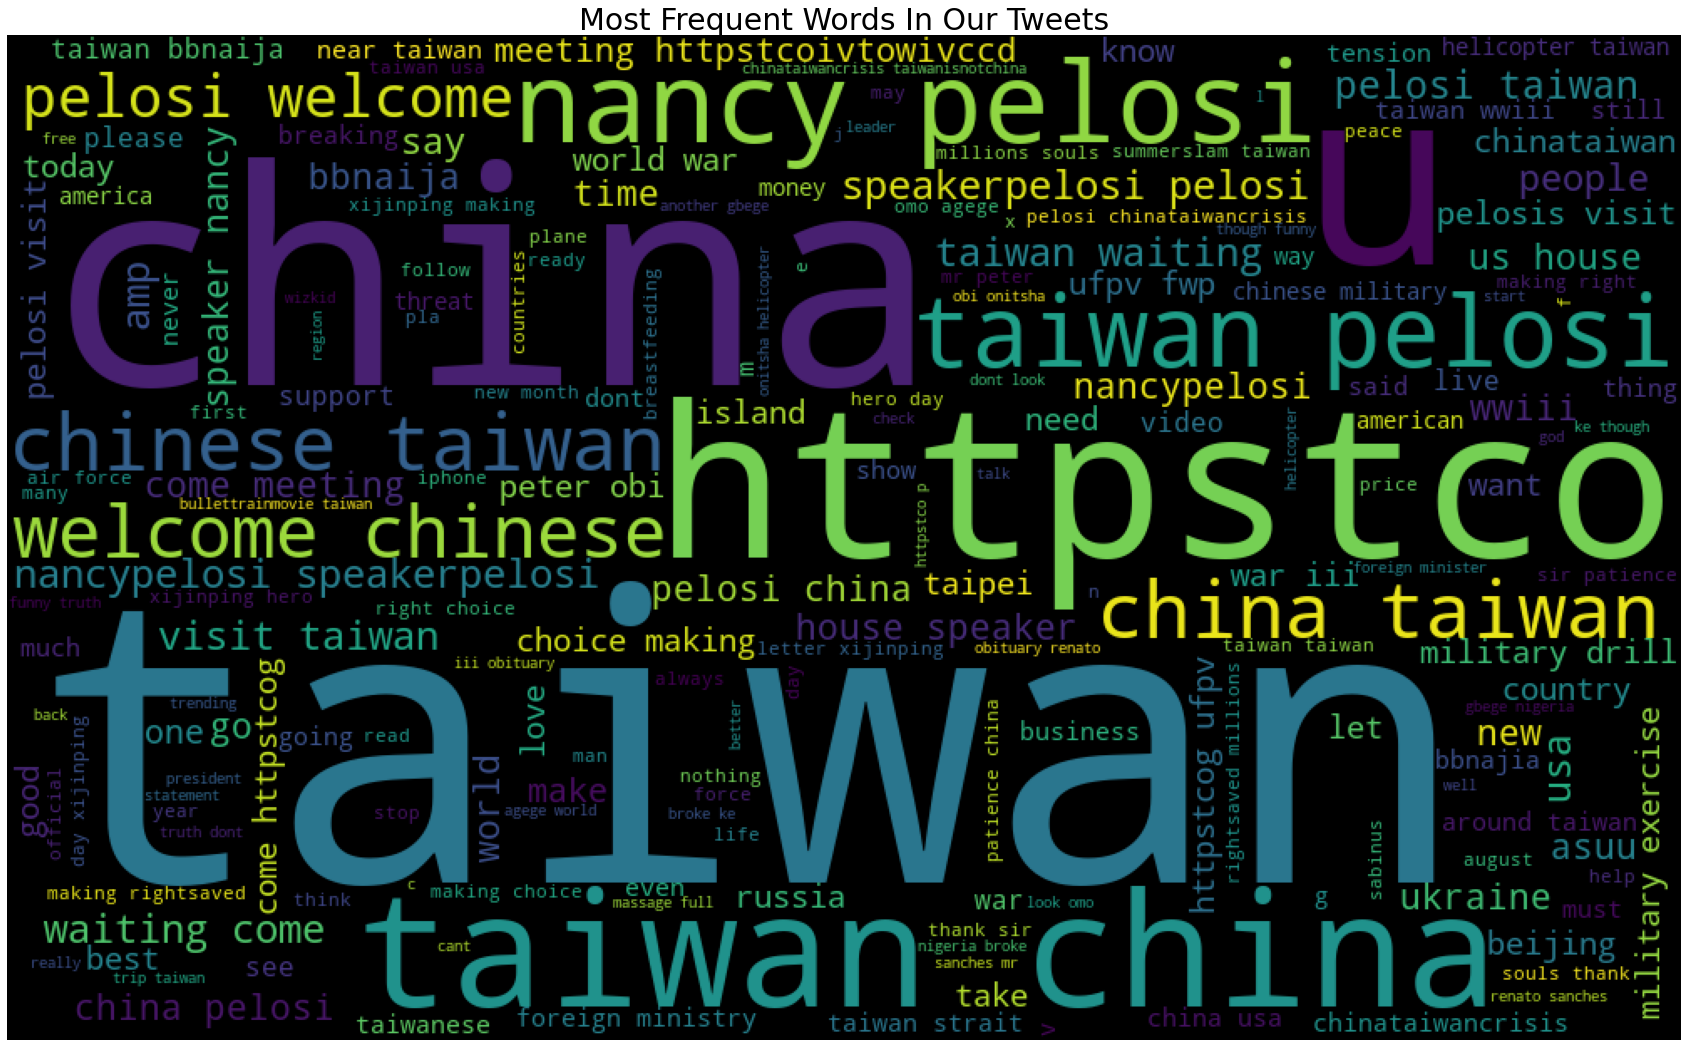

In [23]:
plt.figure(figsize=(30, 20))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(tweets_df['full_text'].values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=30)
plt.show()

In [24]:
tweets_df.to_csv('../data/model_ready_data.csv', index=False)
print('Model Ready Data Successfully Saved.!!!')

Model Ready Data Successfully Saved.!!!
